In [64]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from tensorflow.keras.preprocessing.text import one_hot
nltk.download('punkt')
import tensorflow as tf
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
!pip install tensorflow  # Replace '2.5' with the version you want to install

In [67]:
  file_path="/content/emotion_sentimen_dataset.csv"

In [68]:
df=pd.read_csv(file_path)

In [69]:
df

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
...,...,...,...
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral


In [70]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [71]:
df

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
839550,i feel like telling these horny devils to find...,neutral
839551,i began to realize that when i was feeling agi...,neutral
839552,i feel very curious be why previous early dawn...,neutral
839553,i feel that becuase of the tyranical nature of...,neutral


In [73]:
# Split dataset into input (X) and target (y) columns
X = df['text'].values
y = df['Emotion'].values

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_len = 100  # Define the maximum sequence length
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

In [74]:
# Encode emotion labels as categorical (one-hot encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)


In [75]:
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Define the model architecture
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [77]:
num_epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
20989/20989 [==============================] - 159s 7ms/step - loss: 0.0751 - accuracy: 0.9835 - val_loss: 0.0139 - val_accuracy: 0.9971
Epoch 2/10
20989/20989 [==============================] - 116s 6ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 3/10
20989/20989 [==============================] - 126s 6ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0099 - val_accuracy: 0.9986
Epoch 4/10
20989/20989 [==============================] - 120s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0138 - val_accuracy: 0.9985
Epoch 5/10
20989/20989 [==============================] - 127s 6ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0150 - val_accuracy: 0.9984
Epoch 6/10
20989/20989 [==============================] - 116s 6ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0162 - val_accuracy: 0.9985
Epoch 7/10
20989/20989 [==============================] - 126s 6ms/step - loss: 0.0020 - accuracy: 0.9996 - val_

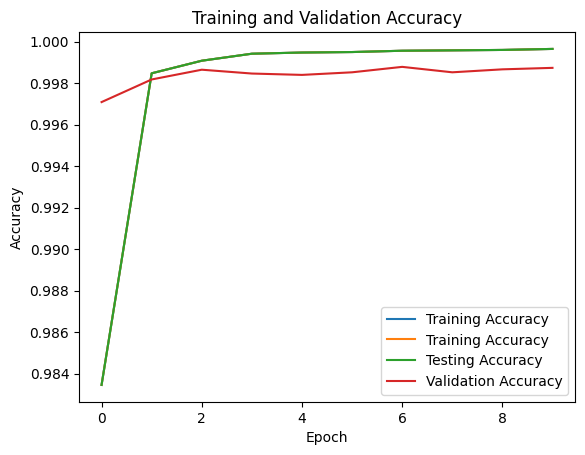

In [80]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
